# USA HOUSING DATASET: PREDICTION AND MAPPING USING CHOROPLETH

## Exploratory Data Analysis

In [64]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
#importing the dataset
df=pd.read_csv('USA_Housing.csv')

In [4]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1848,73135.021608,5.816000,6.329662,2.15,36401.375714,1.279777e+06,"02238 Mary Port\nBrianbury, GA 26390"
641,71624.585367,5.646393,7.438336,6.03,29089.783590,1.175869e+06,"9822 Theresa Spur Suite 629\nNorth Vicki, AR 8..."
794,70130.560625,8.195317,9.570048,4.07,26794.255022,1.675557e+06,"72654 Jason Plaza\nSouth Crystalburgh, MS 24864"
4547,66935.475076,6.376390,8.513826,5.47,17573.617098,1.109059e+06,"55454 Mary Coves Suite 114\nSouth Jennifer, FL..."
1557,76087.154185,5.039400,7.854884,5.03,27616.095455,1.228138e+06,"17616 Nguyen Cove Apt. 639\nOsbornetown, RI 61768"


In [5]:
print(df.shape)
#5000 rows and 7 columns

(5000, 7)


In [6]:
#null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [66]:
features=df.drop(['Address'],axis=1)

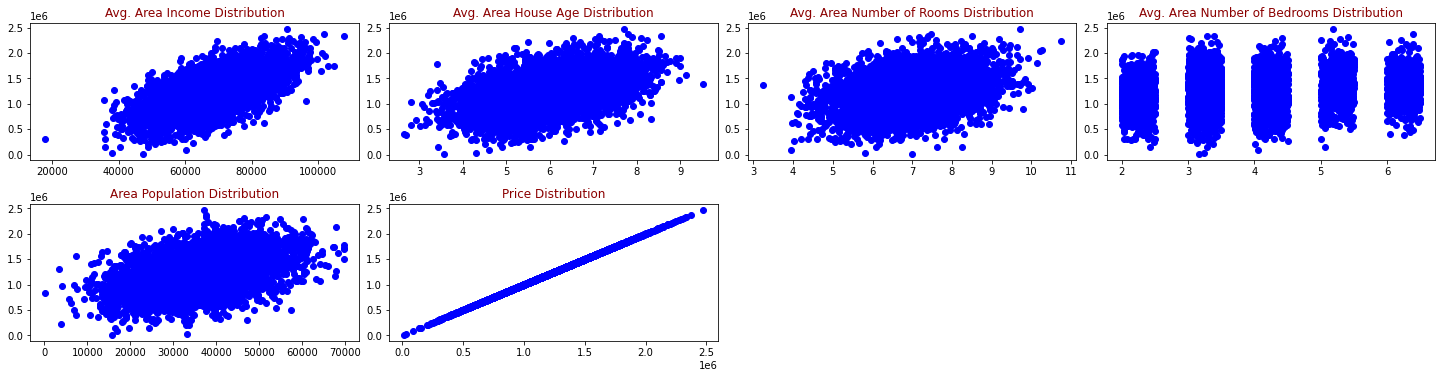

In [75]:
def draw_scatter(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plt.scatter(df[feature],df['Price'],color='blue',marker='o',cmap='viridis')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()  
    plt.show()

draw_scatter(features,features.columns,8,4)

In [8]:
#values which are not static i.e, b/w 1 and 0
continuous_feature=[feature for feature in df if feature not in ['Price']+['Address']]

In [72]:
continuous_df=df.drop(['Price','Address'],axis=1)

In [9]:
print("Count of continuous feature {}".format(len(continuous_feature)))

Count of continuous feature 5


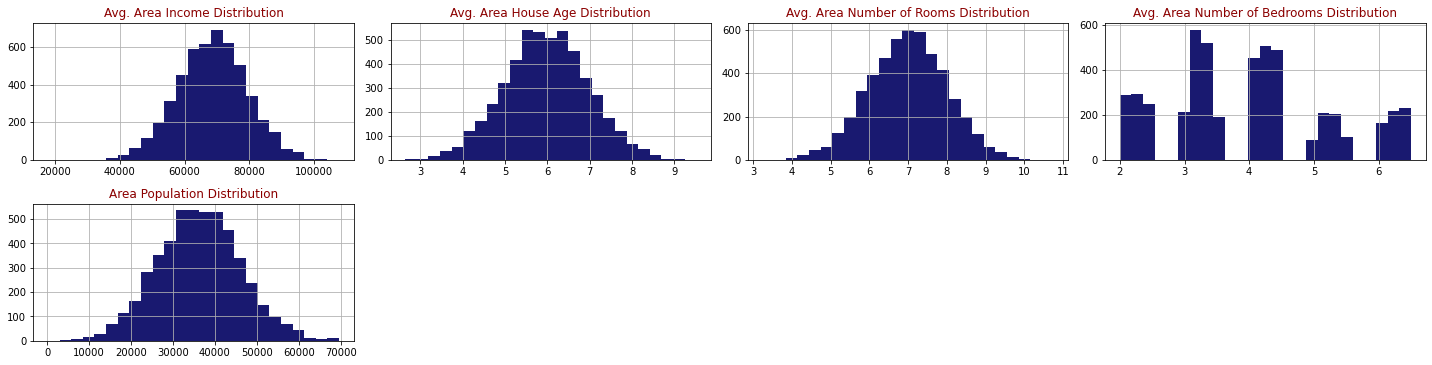

In [74]:
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=25,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()  
    plt.show()

draw_histograms(continuous_df,continuous_df.columns,8,4)

<Figure size 1080x576 with 0 Axes>

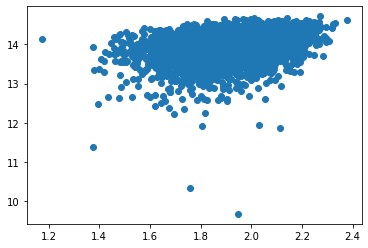

<Figure size 1080x576 with 0 Axes>

In [77]:
# relationship b/w average area of rooms vs price, converting it into log
data=df.copy()
data['Avg. Area Number of Rooms']=np.log(data['Avg. Area Number of Rooms'])
data['Price']=np.log(data['Price'])
plt.scatter(data['Avg. Area Number of Rooms'],data['Price'])
plt.figure(figsize=(15,8))

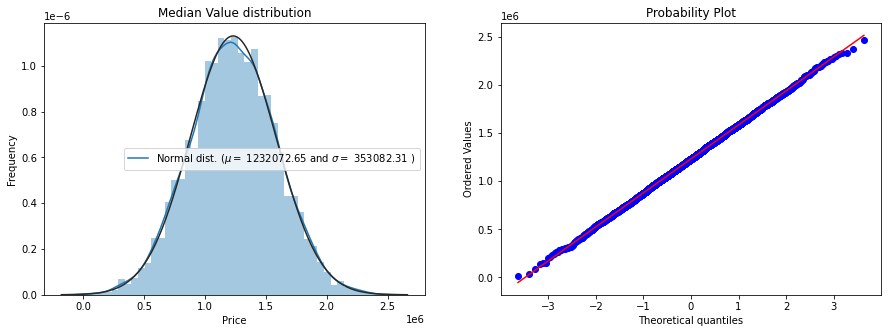

In [135]:
#checking if price is in normal distribution and where most of the values are clustered in
#https://www.kaggle.com/khkuggle/how-to-be-in-top-14
from scipy.stats import norm, skew #for some statistics
# let's create a function to plot the distribution and qq-plot for comparison
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
def plotHistProb() :
    # Plot histogram  
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(features['Price'] , fit=norm);
    (mu, sigma) = norm.fit(features['Price'])
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency')
    plt.title('Median Value distribution')

    # plot probability --> qq-plot
    plt.subplot(1,2,2)
    res = stats.probplot(features['Price'], plot=plt)
    
    
plotHistProb()
plt.savefig('probability_plot.png',bbox_inches='tight')

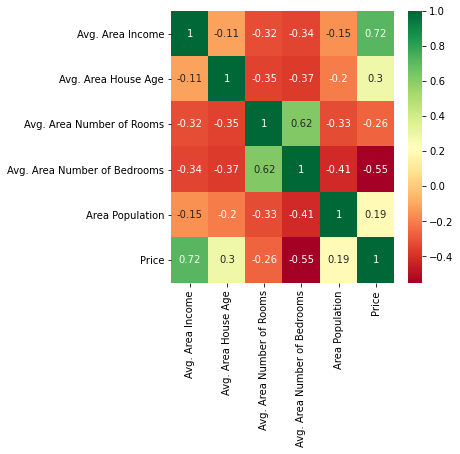

In [143]:
#Correlation among features
corr = features.corr()
highest_corr_features = corr.index[abs(corr["Price"])> 0.5]
plt.figure(figsize=(5,5))
g = sns.heatmap(corr.corr(),annot=True, cmap='RdYlGn')

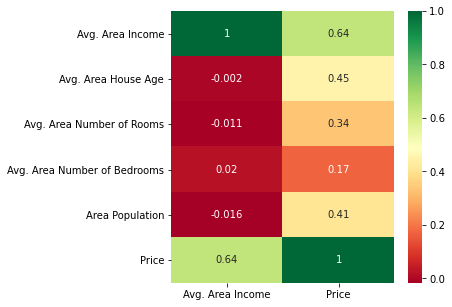

In [142]:
corr = features.corr()
highest_corr_features = corr.index[abs(corr["Price"])> 0.5]
plt.figure(figsize=(5,5))
g = sns.heatmap(corr[highest_corr_features],annot=True, cmap='RdYlGn')

## FEATURE ENGINEERING

In [13]:
from matplotlib import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go

## TREATING OUTLIERS

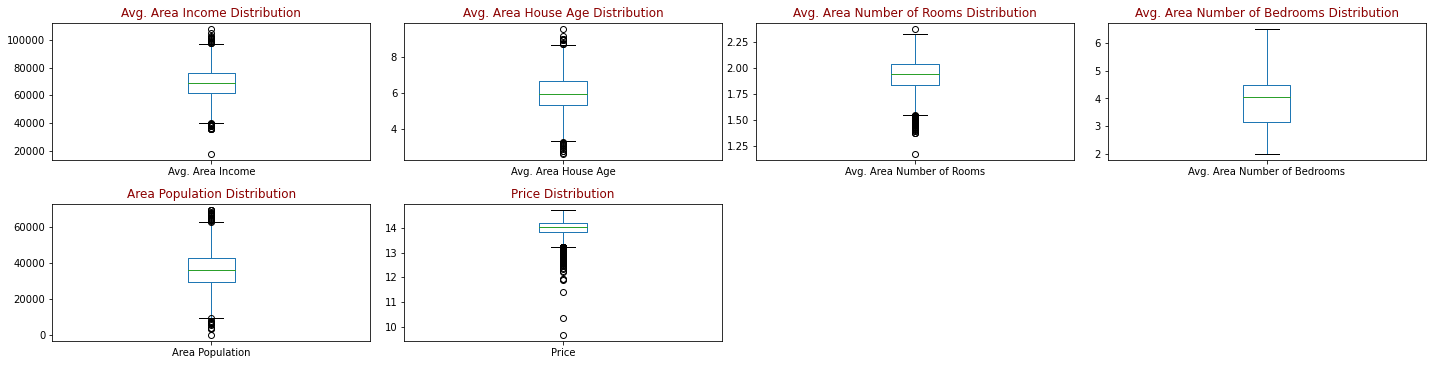

In [81]:
#checking for outliers
def draw_boxplot(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        data[feature].plot(kind='box')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()  
    plt.show()

draw_boxplot(features,features.columns,8,4)

In [15]:
#defining IQR range to remove the outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_boundary=Q1- IQR*1.5
    upper_boundary=Q1+IQR*1.5
    
    ls=df.index[(df[ft]<lower_boundary) | (df[ft]>upper_boundary)]
    
    return ls

In [16]:
#blank list to insert the features to be treated with most outliers
index_list=[]
for feature in ['Area Population','Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms']:
    index_list.extend(outliers(df,feature))

In [17]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [18]:
# new dataframe consisting of removed outliers
df_cleaned=remove(df,index_list)

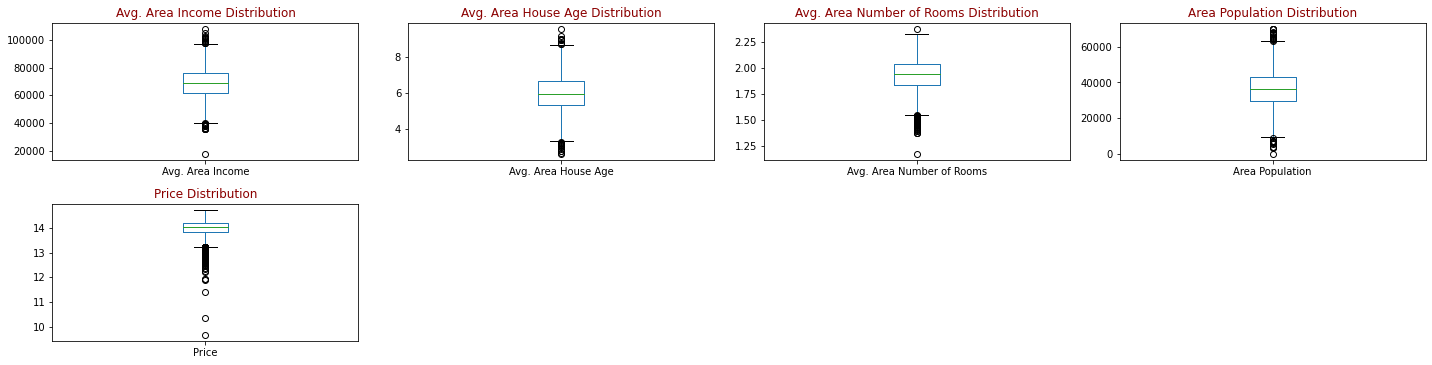

In [83]:
def draw_boxplot(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        data[feature].plot(kind='box')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()  
    plt.show()

draw_boxplot(df_cleaned,df_cleaned.columns,8,4)

## FEATURE SCALING

In [20]:
#feature scaling
df_cleaned.drop(['Avg. Area Number of Bedrooms','Address'],axis=1,inplace=True)

In [21]:
df_cleaned.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06


In [22]:
feature_df=[feature for feature in df_cleaned.columns if feature not in ['Price']]

> Min Max Scaler: This is used to standardise values across all rows and columns

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_cleaned[feature_df])

MinMaxScaler()

In [24]:
check_df=pd.concat([df_cleaned[['Price']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(df_cleaned[feature_df]),columns=feature_df)],
                   axis=1)

In [25]:
check_df.head(2)

,Price,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.059034e+06,0.921015,0.584593,0.669908,0.339144
1,1.505891e+06,0.914070,0.666048,0.601323,0.765261


## FEATURE SELECTION

In [26]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [27]:
#response variable
y=check_df[['Price']]

In [28]:
#predictors
x=check_df.drop('Price',axis=1)

### 1.  Linear Regression 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [31]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [116]:
clf.fit(x_train,y_train)

LinearRegression()

In [122]:
y_train_pred=clf.predict(x_train)

In [92]:
clf.fit(x_test,y_test)

LinearRegression()

In [112]:
y_pred1=clf.predict(x_test)

In [125]:
#Linear Regression Score
clf.score(x_test,y_test)

0.8921181268831856

Text(0.5, 1.0, 'Actual vs Predicted')

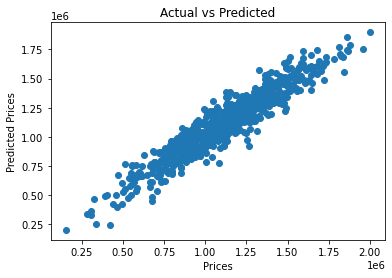

In [103]:
plt.scatter(y_test,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')

## XGBOOST

In [37]:
from xgboost import XGBRegressor
reg_boost=XGBRegressor()
reg_boost.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_pred_boost=reg_boost.predict(x_train)

In [39]:
#BOOST SCORE
reg_boost.score(x_train, y_train)

0.9789262378285917

Text(0.5, 1.0, 'Prices vs Predicted Prices ')

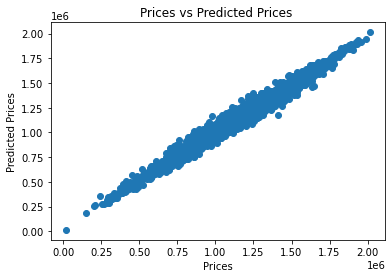

In [40]:
plt.scatter(y_train,y_pred_boost)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices ')

In [41]:
reg_boost.fit(x_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred_test=reg_boost.predict(x_test)

In [106]:
reg_boost.score(x_test,y_test)

0.9992689596900264

## FINAL OUTPUT FOR XGBOOST

In [44]:
import sklearn.metrics as metrics
acc_xgb=metrics.r2_score(y_test,y_pred_test)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_pred_test))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

R^2: 0.9992689596900264
Adjusted R^2: 0.9992646657675008
MAE: 5882.716953985185
MSE: 68063299.17447324
RMSE: 8250.048434674383


## FINAL OUTPUT FOR LINEAR REGRESSION

In [45]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [46]:
lm=LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=lm.predict(x_train)

In [49]:
print('R^2:', metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.8871659607680931
Adjusted R^2: 0.8870011794037529
MAE: 81485.23495398807
MSE: 10380327306.304071
RMSE: 101883.89129938094


Text(0.5, 1.0, 'Prices vs Predicted Prices ')

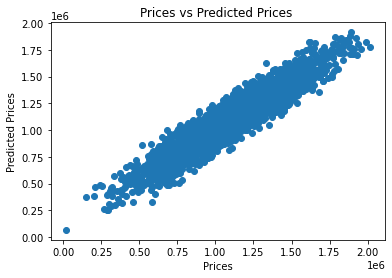

In [50]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices ')

Text(0.5, 1.0, 'Predicted vs Residuals ')

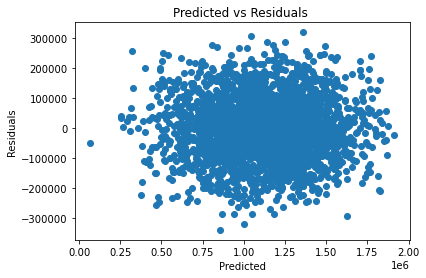

In [51]:
#errors
plt.scatter(y_pred,y_train-y_pred)
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.title('Predicted vs Residuals ')

Text(0.5, 1.0, 'Histogram of Residuals')

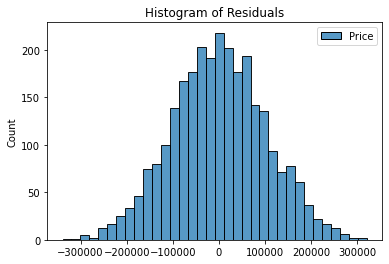

In [52]:
import seaborn as sns
sns.histplot(y_train-y_pred)
plt.title('Histogram of Residuals')

In [53]:
#on test data
y_pred_lmtest=lm.predict(x_test)

In [54]:
acc_linreg=metrics.r2_score(y_test,y_pred_lmtest)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_pred_lmtest))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lmtest))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lmtest))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lmtest)))

R^2: 0.8921181268831856
Adjusted R^2: 0.8914844594933659
MAE: 80982.91940414274
MSE: 10044310970.645418
RMSE: 100221.30996272908


## Model evaluation with Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

<ipython-input-56-61082ace50cd>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [57]:
y_pred_rf=reg.predict(x_train)

In [58]:
print('R^2:', metrics.r2_score(y_train,y_pred_rf))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred_rf))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_rf))
print('MSE:',metrics.mean_squared_error(y_train,y_pred_rf))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_rf)))

R^2: 0.9798478833418107
Adjusted R^2: 0.9798184534525691
MAE: 34048.930467473925
MSE: 1853922524.185183
RMSE: 43057.20060785633


Text(0.5, 1.0, 'Prices vs Predicted Prices ')

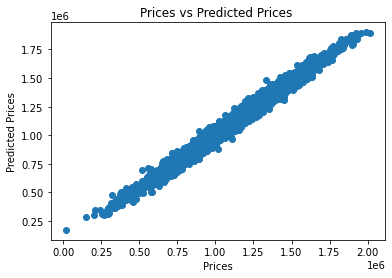

In [59]:
plt.scatter(y_train,y_pred_rf)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices ')

In [60]:
#on testing data
y_pred_test=reg.predict(x_test)

In [61]:
acc_rf=metrics.r2_score(y_test,y_pred_test)
print('Accuracy R^2:', acc_rf)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_pred_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Accuracy R^2: 0.8647296096716754
Adjusted R^2: 0.8639350699340642
MAE: 90155.20541890702
MSE: 12594311039.696918
RMSE: 112224.3780989537


## FINAL SCORES OF MODELS

In [63]:
models=pd.DataFrame({
    'Model':['Linear Regression','Random Forest','XGBoost'],
    'Accuracy Score':[acc_linreg*100,acc_rf*100,acc_xgb*100]
})
models.sort_values(by='Accuracy Score',ascending=False)

,Model,Accuracy Score
2,XGBoost,99.926896
0,Linear Regression,89.211813
1,Random Forest,86.472961


## USING CHOROPLETH TO CHART US POPULATION DENSITY

In [127]:
#importing libraries
import requests
import seaborn as sns
import json
import chart_studio.plotly as py

In [128]:
usa_states=json.load(open('states.geojson','r'))

In [130]:
usa_states_1=usa_states['features'][0]

In [131]:
url='https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population_density'

In [ ]:
states_df=pd.read_html(url)

In [ ]:
state_df=states_df[2]

In [ ]:
state_df.head(2)

In [ ]:
state_df.drop([2,4,6,7,9,13,15,20,21,26,33,37,41,42,43,50,56,57,61],axis=0,inplace=True)

In [ ]:
state_df.drop(16,axis=0,inplace=True)

In [ ]:
usa_states['features'][1]['properties']

In [ ]:
state_id_map={}
for feature in usa_states['features']:
    feature['id_1']=feature['properties']['STATEFP']
    state_id_map[feature['properties']['NAME']]=feature['id_1']

In [ ]:
state_id_map

In [ ]:
state_df['id']=state_df['State/Territory/Division/Region'].apply(lambda x: state_id_map[x])

In [ ]:
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers.default='browser'

In [ ]:
state_df['new_sqkm']=np.log10(state_df['Population/sqmi'])

In [ ]:
fig=px.choropleth(state_df,
                  locations='id',
                  geojson=usa_states,color='new_sqkm',
                  hover_name='State/Territory/Division/Region',
                  hover_data=['Population/sqmi'],
                  scope='north america')
fig.update_geos(fitbounds='locations',visible=False)
fig.show()

In [ ]:
fig=px.choropleth_mapbox(state_df,
                  locations='id',
                  geojson=usa_states,color='new_sqkm',
                  hover_name='State/Territory/Division/Region',
                  hover_data=['Population/sqmi'],
                    mapbox_style='carto-positron',
                    center={'lat':40,'lon':270},
                    zoom=3)
fig.show()